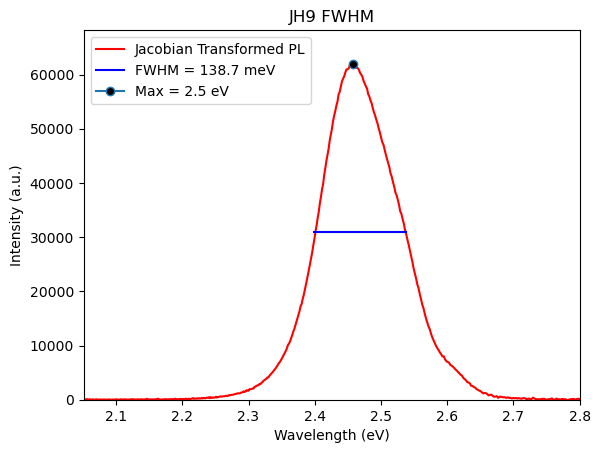

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

samp_name = 'JH9'

save_name = samp_name + '_FWHM'

#File paths of absorbance and PL data
abs_path = '/Users/josuehernandez/jh_sheldon_group/data/Abs/JH Sampels/crude/Abs_JH9_N.txt'
pl_path = '/Users/josuehernandez/jh_sheldon_group/data/PL/crude/PL_JH9_N.txt'

# Figure Save Location
save_path = '/Users/josuehernandez/jh_sheldon_group/figures/fwhm_figures/' + save_name + '.png'

abs_data = pd.read_csv(abs_path, delimiter='\t', names=('wavelength', 'intensity'))
pl_data = pd.read_csv(pl_path, delimiter='\t', names=('wavelength', 'intensity'))

# Figure and axes titles
title = samp_name + ' Absorbance and PL'
x_label = 'Wavelength (nm)'
y_label = 'Normalized Intensity (a.u.)'

# Abs Data
wavelength = abs_data.wavelength
f_int = abs_data.intensity
abs_norm_inten = f_int / np.max(f_int)

# PL data
pl_wavelength = pl_data.wavelength
pl_inten = pl_data.intensity
pl_norm_inten = pl_inten / np.max(pl_inten)


# Full width at half max
x_eV = 1239.84 / pl_wavelength
y_eV = pl_inten * (1239.84/pl_wavelength)**2

#Identify peak
max_idx = y_eV.argmax(axis=0)
half_max_int = y_eV[max_idx] / 2

min_idx = max_idx

while y_eV[min_idx] > half_max_int:
    min_idx -=1

while y_eV[max_idx] > half_max_int:
    max_idx += 1

fwhm = (x_eV[min_idx] - x_eV[max_idx]) * 1000

hm_x = np.linspace(x_eV[min_idx],x_eV[max_idx],100)
hm_y = np.linspace(half_max_int,half_max_int,100)


#Plot New x & y values
plt.plot(x_eV,y_eV, 'red', label='Jacobian Transformed PL')
plt.plot(hm_x,hm_y,'blue', label=str('FWHM = {:.1f}'.format(fwhm)) + ' meV')
plt.plot(x_eV[y_eV.argmax(axis=0)],max(y_eV) ,marker='o', markerfacecolor='black', 
                                    label='Max = ' + str('{:0.1f}'.format(x_eV[y_eV.argmax(axis=0)])) + ' eV')

plt.xlabel('Wavelength (eV)')
plt.ylabel('Intensity (a.u.)')
plt.xlim([2.051, 2.8])
plt.ylim([0, max(y_eV) + 0.1 * max(y_eV)])
plt.legend()
plt.title(samp_name + ' FWHM')
plt.savefig(save_path, dpi=1200)
